API key: dCV21k8yJjw68AFeiUqy
jefflc888
79werewolf
jeffcogg@gmail.com
bulk download:
https://www.quandl.com/api/v3/databases/WIKI/data?api_key=dCV21k8yJjw68AFeiUqy

In [1]:
#import quandl
#quandl.ApiConfig.api_key = "dCV21k8yJjw68AFeiUqy"
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
from dateutil import parser
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

from scipy.interpolate import interp1d, UnivariateSpline
from sklearn.linear_model import LinearRegression

## Loading and Formatting Data

In [2]:
# huge file with ALL the data - over 1.6GB - maybe too much
# just reading in the first n lines for now
#mainfname = "WIKI_20160830.csv"
#mainfname = "WIKI_20160907.csv"
mainfname = "WIKI_20160909.csv"
#somewiki = pd.read_csv(mainfname,nrows=30000,names=['Ticker','Date','Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
#        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'])
allwiki = pd.read_csv(mainfname,names=['Ticker','Date','Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'])

In [6]:
#pickle.dump(allwiki,open("allwiki.pkl","wb"))
allwiki = pickle.load(open("allwiki.pkl","rb"))

IOError: [Errno 2] No such file or directory: 'allwiki.pkl'

In [4]:
#pickle.dump(poss,open("poss.pkl","wb"))
#pickle.dump(negs,open("negs.pkl","wb"))
#pickle.dump(testresult,open("possnegs.pkl","wb"))
#pickle.dump(fulldf2891,open("fulldf2891.pkl","wb"))
# poss = pickle.load(open("poss.pkl","rb"))
# negs = pickle.load(open("negs.pkl","rb"))
# testresult = pickle.load(open("possnegs.pkl","rb"))
#fulldf2891 = pickle.load(open("fulldf2891.pkl","rb"))

In [5]:
len(allwiki)

14329410

In [7]:
allwiki.head(3)

,Ticker,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,A,1999-11-18,45.50,50.0,40.00,44.00,44739900.0,0.0,1.0,43.471810,47.771219,38.216975,42.038673,44739900.0
1,A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,41.025923,41.083249,38.035445,38.580037,10897100.0
2,A,1999-11-22,41.31,44.0,40.06,44.00,4705200.0,0.0,1.0,39.468581,42.038673,38.274301,42.038673,4705200.0


In [3]:
tickergroups = allwiki.groupby(by = ["Ticker"])
def getcurrenttickers(tickgroups):
    current_tickers = []
    for key, group in tickergroups:
        current_tickers.append(key)
    return current_tickers
grouptickers = getcurrenttickers(tickergroups)
len(grouptickers)

3181

In [9]:
grouptickers

['A',
 'AA',
 'AAL',
 'AAMC',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABAX',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCO',
 'ABFS',
 'ABG',
 'ABM',
 'ABMD',
 'ABT',
 'ACAD',
 'ACAS',
 'ACAT',
 'ACC',
 'ACCL',
 'ACCO',
 'ACE',
 'ACET',
 'ACFN',
 'ACGL',
 'ACHC',
 'ACHN',
 'ACI',
 'ACIW',
 'ACLS',
 'ACM',
 'ACN',
 'ACO',
 'ACOR',
 'ACRE',
 'ACRX',
 'ACTG',
 'ACW',
 'ACXM',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMS',
 'ADNC',
 'ADP',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVS',
 'AE',
 'AEC',
 'AEE',
 'AEGN',
 'AEGR',
 'AEIS',
 'AEL',
 'AEO',
 'AEP',
 'AEPI',
 'AERI',
 'AES',
 'AET',
 'AF',
 'AFAM',
 'AFFX',
 'AFG',
 'AFH',
 'AFL',
 'AFOP',
 'AFSI',
 'AGCO',
 'AGEN',
 'AGII',
 'AGIO',
 'AGM',
 'AGN',
 'AGNC',
 'AGO',
 'AGTC',
 'AGX',
 'AGYS',
 'AHC',
 'AHH',
 'AHL',
 'AHP',
 'AHS',
 'AHT',
 'AI',
 'AIG',
 'AIMC',
 'AIN',
 'AINV',
 'AIQ',
 'AIR',
 'AIRM',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'AKAO',
 'AKBA',
 'AKR',
 'AKRX',
 'AKS',
 'AL',
 'ALB',
 'ALCO',
 'A

In [4]:
def createXYFD2(fulldf):
    x = range(len(fulldf))
    y = fulldf["Adj. Close"] #.reshape(-1,1)
    # need to figure out how to scale s automatically
    func = UnivariateSpline(x,y,s=75000)
    der = func.derivative()
    f = func(x)
    d = der(x)
    #return fulldf.index,y,f,d
    return pd.DataFrame(np.array([fulldf["Ticker"],fulldf["Date"],y.astype(float),f.astype(float),d.astype(float)]).transpose(),columns=['ticker','day','close','spline','deriv'])

In [10]:
def createChangeDF2(XYFD_df):
    change_df = XYFD_df.copy()
    change_df.deriv = change_df.deriv.astype(float)
    change_df["deriv_sh1"] = XYFD_df["deriv"].copy().shift(1).astype(float)
    change_df.dropna(how='any',inplace=True)
    change_df = change_df[( (change_df["deriv"] > 0) & (change_df["deriv_sh1"] < 0) ) | ( (change_df["deriv"] < 0) & (change_df["deriv_sh1"] > 0))].copy()
    if len(change_df) > 0:
        change_df.close = change_df.close.astype(float)
        change_df.spline = change_df.spline.astype(float)
        change_df["chg%"] = 100*( (change_df["close"] - change_df["close"].copy().shift(1))/change_df["close"].copy().shift(1) ).astype(float)
        change_df["day"] = pd.to_datetime(change_df.day, format="%Y-%m-%d")
        change_df["length"] = change_df["day"].diff()
        try:
            change_df["slope"] = change_df["chg%"]/ ( change_df["length"] / np.timedelta64(1,'D'))
        except:
            change_df["slope"] = -99999
    return change_df

In [11]:
def getfulldffrommain(tickers,tickergroups):
    results = []
    counter = 0
    for stockcode in tickers:
        try:
            this_data = tickergroups.get_group(stockcode)
            this_change = createChangeDF2(createXYFD2(this_data))
            if len(this_change) != 0:
                this_change.dropna(how='any',inplace=True)
                results.append(this_change)
            counter += 1
            print("Done ",counter)
        except:
            counter += 1
            print("Missed ",counter)
    return pd.concat(results)

In [12]:
#grouptickers2891 = grouptickers[:2891]
#fulldf105 = getfulldffrommain(grouptickers,tickergroups)
#fulldf2891 = getfulldffrommain(grouptickers2891,tickergroups)
#fulldf = getfulldffrommain(grouptickers,tickergroups)

In [13]:
#pickle.dump(fulldf,open("fulldf.pkl","wb"))
fulldf = pickle.load(open("fulldf.pkl","rb"))

In [14]:
#pos2891 = fulldf2891[fulldf2891["chg%"] > 0].copy().reset_index(drop=True)
#neg2891 = fulldf2891[fulldf2891["chg%"] < 0].copy().reset_index(drop=True)
posdf = fulldf[fulldf["chg%"] > 0].copy().reset_index(drop=True)
negdf = fulldf[fulldf["chg%"] < 0].copy().reset_index(drop=True)

## Test Things Out On One Stock

In [5]:
AAPL = tickergroups.get_group("AAPL")
IBM = tickergroups.get_group("IBM")
GE = tickergroups.get_group("GE")
C = tickergroups.get_group("C")
BAC = tickergroups.get_group("BAC")
WMT = tickergroups.get_group("WMT")
UPS = tickergroups.get_group("UPS")

aapldf = createXYFD2(AAPL)

In [ ]:

AAPL = AAPL[AAPL["Date"]>]

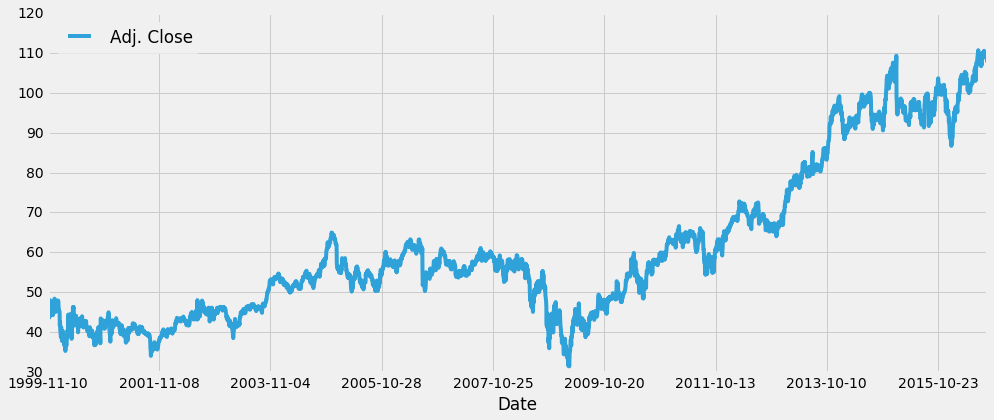

In [86]:
UPS.plot(x='Date',y="Adj. Close")

In [30]:
def concatenate(stock_features):
    result = []
    for stock in stock_features:
        cleaned = stock.dropna()
        index = pd.to_datetime(cleaned['Date'])
        cleaned.drop('Date', axis=1, inplace=True)
        cleaned['Date'] = index
        cleaned.set_index('Date', inplace=True)
        result.append(cleaned)
    return result[0].join(result[1:], how='outer').dropna()

In [33]:
f = map(allfeatures, [AAPL, C, IBM])

In [35]:
c = concatenate(f)

/Users/dgold/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dgold/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
c.ix['2007-01-01':]

,Ticker_AAPL,Volume_AAPL,Adj. Open_AAPL,Adj. High_AAPL,Adj. Low_AAPL,Adj. Close_AAPL,Adj. Volume_AAPL,spline_AAPL,deriv_AAPL,pct3d_AAPL,...,9dL_sh23_IBM,23dL_sh23_IBM,is3dH_sh23_IBM,is9dH_sh23_IBM,is23dH_sh23_IBM,is3dL_sh23_IBM,is9dL_sh23_IBM,is23dL_sh23_IBM,9d23dH_sh23_IBM,9d23dL_sh23_IBM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,AAPL,44225700.0,11.286424,11.324355,10.712228,10.960741,309579900.0,11.699470,0.016188,0.027969,...,75.326279,74.598066,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2007-01-04,AAPL,30259300.0,10.993440,11.241953,10.963357,11.204022,211815100.0,11.715664,0.016200,0.059231,...,75.326279,74.598066,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2007-01-05,AAPL,29812200.0,11.218410,11.274652,11.039219,11.124236,208685400.0,11.731871,0.016213,0.002475,...,75.326279,75.132318,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2007-01-08,AAPL,28468100.0,11.243261,11.317815,11.154320,11.179171,199276700.0,11.748090,0.016226,0.019928,...,75.243820,75.132318,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2007-01-09,AAPL,119617800.0,11.307351,12.161452,11.137316,12.107826,837324600.0,11.764322,0.016238,0.080668,...,75.243820,75.132318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,AAPL,105460000.0,12.392962,12.791891,12.222927,12.687254,738220000.0,11.780566,0.016251,0.140506,...,75.243820,75.132318,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2007-01-11,AAPL,51437600.0,12.548610,12.658479,12.438741,12.530298,360063200.0,11.796823,0.016263,0.120861,...,75.243820,75.132318,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2007-01-12,AAPL,46881800.0,12.372034,12.433509,12.194151,12.375958,328172600.0,11.813093,0.016276,0.022145,...,75.243820,75.243820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2007-01-16,AAPL,44431300.0,12.514603,12.719953,12.484519,12.700333,311019100.0,11.829375,0.016288,0.001031,...,75.243820,75.243820,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [22]:
def allfeatures(fulldf):
    data = fulldf.copy()
    data.drop(['Ex-Dividend','Split Ratio','Open','High','Low','Close'],axis=1,inplace=True)
    x = range(len(data))
    y = data["Adj. Close"] #.reshape(-1,1)
    # need to figure out how to scale s automatically
    func = UnivariateSpline(x,y,s=75000)
    der = func.derivative()
    f = func(x)
    d = der(x)
    data['spline'] = f.astype(float)
    data['deriv'] = d.astype(float)
    data['pct3d'] = data["Adj. Close"].pct_change(periods=3)
    data['pct7d'] = data["Adj. Close"].pct_change(periods=7)
    data['pct17'] = data["Adj. Close"].pct_change(periods=17)
    data['std7'] = data["Adj. Close"].rolling(center=False,window=7).std()
    data['std17'] = data["Adj. Close"].rolling(center=False,window=17).std()
    data['3dH'] = data["Adj. Close"].rolling(center=False,window=3).max()
    data['9dH'] = data["Adj. Close"].rolling(center=False,window=9).max()
    data['23dH'] = data["Adj. Close"].rolling(center=False,window=23).max()
    data['3dL'] = data["Adj. Close"].rolling(center=False,window=3).min()
    data['9dL'] = data["Adj. Close"].rolling(center=False,window=9).min()
    data['23dL'] = data["Adj. Close"].rolling(center=False,window=23).min()
    data['is3dH'] = (data["Adj. Close"] == data['3dH']).astype(int)
    data['is9dH'] = (data["Adj. Close"] == data['9dH']).astype(int)
    data['is23dH'] = (data["Adj. Close"] == data['23dH']).astype(int)
    data['is3dL'] = (data["Adj. Close"] == data['3dL']).astype(int)
    data['is9dL'] = (data["Adj. Close"] == data['9dL']).astype(int)
    data['is23dL'] = (data["Adj. Close"] == data['23dL']).astype(int)
    data['9d23dH'] = (data["9dH"] == data['23dH']).astype(int)
    data['9d23dL'] = (data["9dL"] == data['23dL']).astype(int)
    # shifts of 3
    data['close_sh3'] = data["Adj. Close"].shift(3)   
    #data['spline_sh3'] = pd.DataFrame(f.astype(float)).shift(3)
    #data['deriv_sh3'] = pd.DataFrame(d.astype(float)).shift(3)
    data['pct3d_sh3'] = data["Adj. Close"].pct_change(periods=3).shift(3)
    data['pct7d_sh3'] = data["Adj. Close"].pct_change(periods=7).shift(3)
    data['pct17_sh3'] = data["Adj. Close"].pct_change(periods=17).shift(3)
    data['std7_sh3'] = data["Adj. Close"].rolling(center=False,window=7).std().shift(3)
    data['std17_sh3'] = data["Adj. Close"].rolling(center=False,window=17).std().shift(3)
    data['3dH_sh3'] = data["Adj. Close"].rolling(center=False,window=3).max().shift(3)
    data['9dH_sh3'] = data["Adj. Close"].rolling(center=False,window=9).max().shift(3)
    data['23dH_sh3'] = data["Adj. Close"].rolling(center=False,window=23).max().shift(3)
    data['3dL_sh3'] = data["Adj. Close"].rolling(center=False,window=3).min().shift(3)
    data['9dL_sh3'] = data["Adj. Close"].rolling(center=False,window=9).min().shift(3)
    data['23dL_sh3'] = data["Adj. Close"].rolling(center=False,window=23).min().shift(3)
    data['is3dH_sh3'] = (data["Adj. Close"] == data['3dH']).astype(int).shift(3)
    data['is9dH_sh3'] = (data["Adj. Close"] == data['9dH']).astype(int).shift(3)
    data['is23dH_sh3'] = (data["Adj. Close"] == data['23dH']).astype(int).shift(3)    
    data['is3dL_sh3'] = (data["Adj. Close"] == data['3dL']).astype(int).shift(3) 
    data['is9dL_sh3'] = (data["Adj. Close"] == data['9dL']).astype(int).shift(3) 
    data['is23dL_sh3'] = (data["Adj. Close"] == data['23dL']).astype(int).shift(3) 
    data['9d23dH_sh3'] = (data["9dH"] == data['23dH']).astype(int).shift(3) 
    data['9d23dL_sh3'] = (data["9dL"] == data['23dL']).astype(int).shift(3)
    # shifts of 23
    data['close_sh23'] = data["Adj. Close"].shift(23)   
    #data['spline_sh23'] = pd.DataFrame(f.astype(float)).shift(23)
    #data['deriv_sh23'] = pd.DataFrame(d.astype(float)).shift(23)
    data['pct3d_sh13'] = data["Adj. Close"].pct_change(periods=3).shift(23)
    data['pct7d_sh23'] = data["Adj. Close"].pct_change(periods=7).shift(23)
    data['pct17_sh23'] = data["Adj. Close"].pct_change(periods=17).shift(23)
    data['std7_sh23'] = data["Adj. Close"].rolling(center=False,window=7).std().shift(23)
    data['std17_sh23'] = data["Adj. Close"].rolling(center=False,window=17).std().shift(23)
    data['3dH_sh23'] = data["Adj. Close"].rolling(center=False,window=3).max().shift(23)
    data['9dH_sh23'] = data["Adj. Close"].rolling(center=False,window=9).max().shift(23)
    data['23dH_sh23'] = data["Adj. Close"].rolling(center=False,window=23).max().shift(23)
    data['3dL_sh23'] = data["Adj. Close"].rolling(center=False,window=3).min().shift(23)
    data['9dL_sh23'] = data["Adj. Close"].rolling(center=False,window=9).min().shift(23)
    data['23dL_sh23'] = data["Adj. Close"].rolling(center=False,window=23).min().shift(23)
    data['is3dH_sh23'] = (data["Adj. Close"] == data['3dH']).astype(int).shift(23)
    data['is9dH_sh23'] = (data["Adj. Close"] == data['9dH']).astype(int).shift(23)
    data['is23dH_sh23'] = (data["Adj. Close"] == data['23dH']).astype(int).shift(23)    
    data['is3dL_sh23'] = (data["Adj. Close"] == data['3dL']).astype(int).shift(23) 
    data['is9dL_sh23'] = (data["Adj. Close"] == data['9dL']).astype(int).shift(23) 
    data['is23dL_sh23'] = (data["Adj. Close"] == data['23dL']).astype(int).shift(23) 
    data['9d23dH_sh23'] = (data["9dH"] == data['23dH']).astype(int).shift(23) 
    data['9d23dL_sh23'] = (data["9dL"] == data['23dL']).astype(int).shift(23)  
    name = data['Ticker'].iloc[0]
    data.columns = [col + '_%s' % name if col is not 'Date' else col for col in data.columns]
    return data

In [18]:
AAPL = tickergroups.get_group("AAPL")
aaplallfeats = allfeatures(AAPL)

In [82]:
aaplallfeats.tail(3)

,Ticker,Date,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,spline,deriv,...,9dL_sh23,23dL_sh23,is3dH_sh23,is9dH_sh23,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23
49175,AAPL,2016-09-07,41986323.0,107.83,108.76,107.07,108.3808,41986323.0,105.684510,0.237073,...,96.152320,94.481316,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49176,AAPL,2016-09-08,51633388.0,107.25,107.27,105.24,105.5200,51633388.0,105.923617,0.241145,...,96.152320,95.018424,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49177,AAPL,2016-09-09,45545213.0,104.64,105.72,103.13,103.1300,45545213.0,106.166808,0.245240,...,102.398689,95.426229,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
aaplallfeats.tail(3)

,Ticker,Date,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,spline,deriv,...,9dL_sh23,23dL_sh23,is3dH_sh23,is9dH_sh23,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23
49175,AAPL,2016-09-07,41986323.0,107.83,108.76,107.07,108.3808,41986323.0,105.684510,0.237073,...,96.152320,94.481316,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49176,AAPL,2016-09-08,51633388.0,107.25,107.27,105.24,105.5200,51633388.0,105.923617,0.241145,...,96.152320,95.018424,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49177,AAPL,2016-09-09,45545213.0,104.64,105.72,103.13,103.1300,45545213.0,106.166808,0.245240,...,102.398689,95.426229,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [45]:
def changeallfeats(allfeats_df):
    change_df = allfeats_df.copy()
    change_df.deriv = change_df.deriv.astype(float)
    change_df["deriv_sh1"] = allfeats_df["deriv"].copy().shift(1).astype(float)
    change_df.dropna(how='any',inplace=True)
    change_df = change_df[( (change_df["deriv"] > 0) & (change_df["deriv_sh1"] < 0) ) | ( (change_df["deriv"] < 0) & (change_df["deriv_sh1"] > 0))].copy()
    if len(change_df) > 0:
        change_df["Adj. Close"] = change_df["Adj. Close"].astype(float)
        change_df.spline = change_df.spline.astype(float)
        change_df["chg%"] = 100*( (change_df["Adj. Close"] - change_df["Adj. Close"].copy().shift(1))/change_df["Adj. Close"].copy().shift(1) ).astype(float)
        change_df["Date"] = pd.to_datetime(change_df["Date"], format="%Y-%m-%d")
        change_df["length"] = change_df["Date"].diff()
        try:
            change_df["slope"] = change_df["chg%"]/ ( change_df["length"] / np.timedelta64(1,'D'))
        except:
            change_df["slope"] = -99999
    return change_df

In [46]:
aaplallfeats.columns

Index(['Ticker', 'Date', 'Volume', 'Adj. Open', 'Adj. High', 'Adj. Low',
       'Adj. Close', 'Adj. Volume', 'spline', 'deriv', 'pct3d', 'pct7d',
       'pct17', 'std7', 'std17', '3dH', '9dH', '23dH', '3dL', '9dL', '23dL',
       'is3dH', 'is9dH', 'is23dH', 'is3dL', 'is9dL', 'is23dL', '9d23dH',
       '9d23dL', 'close_sh3', 'pct3d_sh3', 'pct7d_sh3', 'pct17_sh3',
       'std7_sh3', 'std17_sh3', '3dH_sh3', '9dH_sh3', '23dH_sh3', '3dL_sh3',
       '9dL_sh3', '23dL_sh3', 'is3dH_sh3', 'is9dH_sh3', 'is23dH_sh3',
       'is3dL_sh3', 'is9dL_sh3', 'is23dL_sh3', '9d23dH_sh3', '9d23dL_sh3',
       'close_sh23', 'pct3d_sh13', 'pct7d_sh23', 'pct17_sh23', 'std7_sh23',
       'std17_sh23', '3dH_sh23', '9dH_sh23', '23dH_sh23', '3dL_sh23',
       '9dL_sh23', '23dL_sh23', 'is3dH_sh23', 'is9dH_sh23', 'is23dH_sh23',
       'is3dL_sh23', 'is9dL_sh23', 'is23dL_sh23', '9d23dH_sh23',
       '9d23dL_sh23'],
      dtype='object')

In [47]:
aapl_chgdf = changeallfeats(aaplallfeats)

In [48]:
aapl_chgdf.tail()

,Ticker,Date,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,spline,deriv,...,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23,deriv_sh1,chg%,length,slope
45219,AAPL,2000-12-13,6158700.0,1.017596,1.017596,0.973125,0.980973,86221800.0,0.690237,7.028132e-07,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.000004,-29.634257,2240 days,-0.013230
48173,AAPL,2012-09-12,25436900.0,87.593964,87.994596,86.168764,87.980147,178058300.0,74.128884,-1.067079e-03,...,1.0,0.0,0.0,0.0,1.0,0.0,0.000291,8868.659271,4291 days,2.066805
48376,AAPL,2013-07-08,10647800.0,56.131676,56.250591,54.867708,55.455600,74534600.0,62.497923,2.304573e-04,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.000888,-36.968053,299 days,-0.123639
48867,AAPL,2015-06-18,35407220.0,124.010484,125.063155,124.000737,124.644036,35407220.0,120.105242,-4.496132e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001281,124.763660,710 days,0.175723
49103,AAPL,2016-05-25,38642108.0,98.141609,99.205879,97.584608,99.086522,38642108.0,97.798027,6.876577e-04,...,0.0,1.0,1.0,0.0,1.0,0.0,-0.001806,-20.504402,342 days,-0.059954


### More feature ideas for when I have time:
* Prices above or below spline
* Prices percent distance from spline
* Prices percent distance from n-day high or low

###  Build a simple model

In [22]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import mean_squared_error

In [23]:
aapl_label = aaplallfeats['pct3d']
aapl_data = aaplallfeats.drop(['Ticker', 'Date', 'Volume', 'Adj. Open', 'Adj. High', 'Adj. Low',
       'Adj. Close', 'Adj. Volume', 'spline', 'deriv', 'pct3d', 'pct7d',
       'pct17', 'std7', 'std17', '3dH', '9dH', '23dH', '3dL', '9dL', '23dL',
       'is3dH', 'is9dH', 'is23dH', 'is3dL', 'is9dL', 'is23dL', '9d23dH',
       '9d23dL'],axis=1)

In [24]:
aapl_data.tail(3)

,close_sh3,pct3d_sh3,pct7d_sh3,pct17_sh3,std7_sh3,std17_sh3,3dH_sh3,9dH_sh3,23dH_sh3,3dL_sh3,...,9dL_sh23,23dL_sh23,is3dH_sh23,is9dH_sh23,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23
49175,106.73,-0.000843,-0.019476,-0.019116,0.731548,1.160331,106.73,108.85,109.48,106.00,...,96.152320,94.481316,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49176,107.73,0.016321,-0.002777,-0.002500,0.658367,1.162331,107.73,108.85,109.48,106.10,...,96.152320,95.018424,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49177,107.68,0.014892,0.001023,-0.002316,0.679625,1.164780,107.73,108.03,109.48,106.73,...,102.398689,95.426229,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


### Build holdout set to test different models

In [25]:
aapl_data.dropna(how='any',inplace=True)

In [26]:
len(aapl_data)

8969

In [27]:
aapl_label = aapl_label[len(aapl_label)-len(aapl_data):]

In [28]:
print(len(aapl_data),len(aapl_label))

8969 8969


In [74]:
aapl_data.tail(3)

,close_sh3,pct3d_sh3,pct7d_sh3,pct17_sh3,std7_sh3,std17_sh3,3dH_sh3,9dH_sh3,23dH_sh3,3dL_sh3,...,9dL_sh23,23dL_sh23,is3dH_sh23,is9dH_sh23,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23
49175,106.73,-0.000843,-0.019476,-0.019116,0.731548,1.160331,106.73,108.85,109.48,106.00,...,96.152320,94.481316,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49176,107.73,0.016321,-0.002777,-0.002500,0.658367,1.162331,107.73,108.85,109.48,106.10,...,96.152320,95.018424,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49177,107.68,0.014892,0.001023,-0.002316,0.679625,1.164780,107.73,108.03,109.48,106.73,...,102.398689,95.426229,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
aapl_label.tail(3)

49175    0.015467
49176   -0.020514
49177   -0.042255
Name: pct3d, dtype: float64

In [29]:
len(aapl_label)/10

896.9

In [30]:
# using the last 10% of the data as holdout set
last10p = int(len(aapl_label)/10)
X_train1, X_holdout, y_train1, y_holdout = aapl_data[:-last10p], aapl_data[-last10p:], aapl_label[:-last10p], aapl_label[-last10p:]

In [31]:
# use the last 30% of non-holdout data as test set
last30p = int(len(aapl_label)*.3)
X_train, X_test, y_train, y_test = X_train1[:-last30p], X_train1[-last30p:], y_train1[:-last30p], y_train1[-last30p:]

In [32]:
# Some Super Basic Models
LS = Lasso()
LS.fit(X_train,y_train)
LS_ypred = LS.predict(X_test)
LSmse = mean_squared_error(y_test,LS_ypred)

RG = Ridge()
RG.fit(X_train,y_train)
RG_ypred = RG.predict(X_test)
RGmse = mean_squared_error(y_test,RG_ypred)

LR = LinearRegression()
LR.fit(X_train,y_train)
LR_ypred = LR.predict(X_test)
LRmse = mean_squared_error(y_test,LR_ypred)

RF = RandomForestRegressor()
RF.fit(X_train,y_train)
RF_ypred = RF.predict(X_test)
RFmse = mean_squared_error(y_test,RF_ypred)

GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_ypred = GB.predict(X_test)
GBmse = mean_squared_error(y_test,GB_ypred)

In [33]:
print("LS: ",LSmse,"RG: ",RGmse,"LR: ",LRmse,"RF: ",RFmse,"GB: ",GBmse)

LS:  0.00174712007461 RG:  0.0136639393003 LR:  0.0159869088856 RF:  0.0516671792234 GB:  0.0122599395811


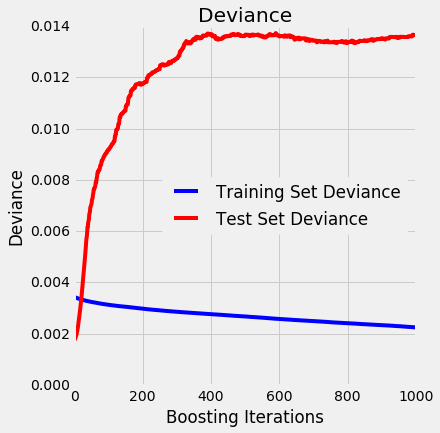

In [34]:
###############################################################################
# Plot training deviance
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
GB2 = GradientBoostingRegressor(**params)
GB2.fit(X_train,y_train)

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(GB2.staged_predict(X_test)):
    test_score[i] = GB2.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GB2.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='best')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [79]:
y_pred[:5]

array([ 0.00663016,  0.01057897,  0.02320839, -0.0037227 , -0.00241666])

In [81]:
list(zip(y_test,y_pred))

[(-0.017595307917888436, 0.0066301616101828139),
 (0.022399203583872485, 0.010578965374465612),
 (0.031218014329580379, 0.023208388862894919),
 (-0.14825870646766171, -0.0037226978863271819),
 (-0.16699123661148951, -0.0024166637248036167),
 (-0.1637717121588087, -0.0027478410789551527),
 (0.008761682242990565, 0.015317297708369898),
 (0.0017533606078314889, 0.0094672667304502994),
 (-0.017804154302670683, 0.011234279187810003),
 (-0.012159814707585537, -0.010032224889736194),
 (0.033838973162193531, -0.005968964275237027),
 (0.03081570996978833, 0.00017167895632883159),
 (-0.0070339976553339678, 0.0055963608825162631),
 (-0.0095936794582391904, -0.0025408497744410967),
 (0.09847596717467777, -0.0035690551951375422),
 (0.063164108618654291, 0.00030739911152845572),
 (-0.0011396011396009875, -0.0034731756422516206),
 (-0.075773745997865571, -0.0024371600702904686),
 (0.016102165463630858, -0.0074441805423371274),
 (-0.0017113519680550526, -0.0060201621439821378),
 (0.052540415704388055,

In [35]:
#what does that even mean, to have a score of -6.88 ???
GB2.score(X_test,y_test)

-6.8510732404072989

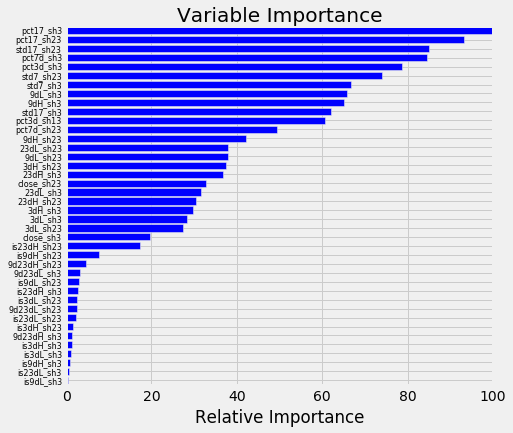

In [36]:
###############################################################################
# Plot feature importance
feature_importance = GB2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, aapl_data.columns[sorted_idx],fontsize=8)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Get Regimes With All Features

In [40]:
def getfeaturedregimes(tickers,tickergroups):
    results = []
    counter = 0
    for stockcode in tickers:
        try:
            this_data = tickergroups.get_group(stockcode)
            this_change = changeallfeats(allfeatures(this_data))
            if len(this_change) != 0:
                this_change.dropna(how='any',inplace=True)
                results.append(this_change)
            counter += 1
            print("Done ",counter,stockcode)
        except:
            counter += 1
            print("Missed ",counter,stockcode)
    return pd.concat(results)

In [49]:
allstocksallfeats = getfeaturedregimes(grouptickers,tickergroups)

Done  1 A
Done  2 AA
Done  3 AAL
Done  4 AAMC
Done  5 AAN
Done  6 AAOI
Done  7 AAON
Done  8 AAP
Done  9 AAPL
Done  10 AAT
Done  11 AAWW
Done  12 ABAX
Done  13 ABBV
Done  14 ABC
Done  15 ABCB
Done  16 ABCO
Done  17 ABFS
Done  18 ABG
Done  19 ABM
Done  20 ABMD
Done  21 ABT
Done  22 ACAD
Done  23 ACAS
Done  24 ACAT
Done  25 ACC
Done  26 ACCL
Done  27 ACCO
Done  28 ACE
Done  29 ACET
Done  30 ACFN
Done  31 ACGL
Done  32 ACHC
Done  33 ACHN
Done  34 ACI
Done  35 ACIW
Done  36 ACLS
Done  37 ACM
Done  38 ACN
Done  39 ACO
Done  40 ACOR
Done  41 ACRE
Done  42 ACRX
Done  43 ACTG
Done  44 ACW
Done  45 ACXM
Done  46 ADBE
Done  47 ADC
Done  48 ADES
Done  49 ADI
Done  50 ADM
Done  51 ADMS
Done  52 ADNC
Done  53 ADP
Done  54 ADS
Done  55 ADSK
Done  56 ADT
Done  57 ADTN
Done  58 ADUS
Done  59 ADVS
Done  60 AE
Done  61 AEC
Done  62 AEE
Done  63 AEGN
Done  64 AEGR
Done  65 AEIS
Done  66 AEL
Done  67 AEO
Done  68 AEP
Done  69 AEPI
Done  70 AERI
Done  71 AES
Done  72 AET
Done  73 AF
Done  74 AFAM
Done  75 A

In [50]:
allstocksallfeats.tail(3)

,Ticker,Date,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,spline,deriv,...,is23dH_sh23,is3dL_sh23,is9dL_sh23,is23dL_sh23,9d23dH_sh23,9d23dL_sh23,deriv_sh1,chg%,length,slope
14326451,ZTS,2016-03-24,4796572.0,42.096447,42.883203,41.957022,42.305585,4796572.0,47.963305,-0.000116,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000160,46.966229,933 days,0.050339
14327543,ZUMZ,2009-03-20,231800.0,8.300000,8.300000,7.660000,7.670000,231800.0,12.528133,0.000179,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.000012,-76.953125,785 days,-0.098029
14328861,ZUMZ,2014-06-17,391885.0,28.200000,28.610000,27.580000,27.860000,391885.0,29.224617,-0.000035,...,0.0,1.0,0.0,0.0,1.0,0.0,0.000017,263.233377,1915 days,0.137459


In [51]:
#pickle.dump(allstocksallfeats,open("allstocksallfeats.pkl","wb"))
allstocksallfeats = pickle.load(open("allstocksallfeats.pkl","rb"))

## SOME QUESTIONS

### How to do rolling with a RF or GB etc model

### How to handle cross-validation with time-series - any easy functions to use, or way to modify GridSearchCV ? 

### Cross-validation: definitely don't want to shuffle

### Does curse of dimensionality operate for regressors as well?

### Determining Feature Importances

In [ ]:
def build_grid_search_est(model, X, y, cv=5, **params):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

In [ ]:
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 0.1, 30))

## Exploratory Data Analysis
* Plotting histograms of positive and negative price moves by frequencies of percent change and length of move

In [52]:
posdf.head(2)

,ticker,day,close,spline,deriv,deriv_sh1,chg%,length,slope
0,A,2002-01-14,29.064010,28.088571,-0.000353,0.000914,12.002946,140 days,0.085735
1,A,2004-03-15,28.920696,28.453927,-0.000290,0.000505,80.178571,411 days,0.195082


In [53]:
print(len(posdf),len(negdf))

21733 21304


In [54]:
#posdf[posdf["ticker"]=="ARWR"].max()

In [55]:
posdf = posdf[posdf['chg%'] != np.inf]

In [56]:
posdf[np.isinf(posdf["chg%"])]

,ticker,day,close,spline,deriv,deriv_sh1,chg%,length,slope


In [57]:
np.array(posdf['chg%']).max()

29472768462.38715

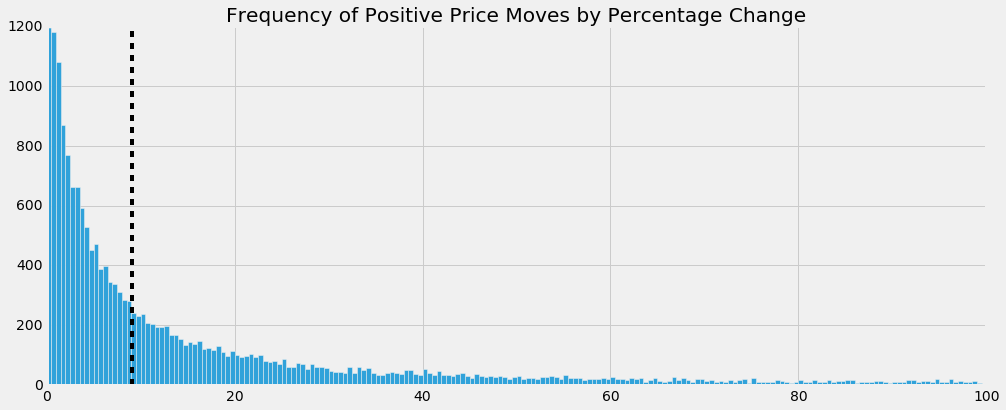

In [58]:
pos_y = np.array(posdf['chg%'].values)
plt.axvline(x=np.median(pos_y),ymin=0,ymax=600,color='k',ls='dashed')
plt.title("Frequency of Positive Price Moves by Percentage Change")
hist = plt.hist(pos_y,bins=np.arange(0,100,0.5))

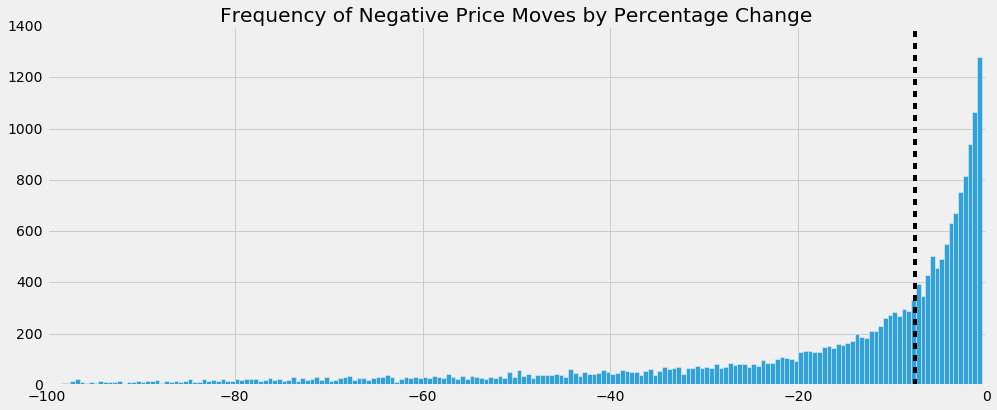

In [59]:
neg_y = np.array(negdf['chg%'].values)
plt.axvline(x=np.median(neg_y),ymin=0,ymax=600,color='k',ls='dashed',label="median")
plt.title("Frequency of Negative Price Moves by Percentage Change")
hist = plt.hist(neg_y,bins=np.arange(-100,0,0.5))

In [60]:
print(np.median(pos_y),np.mean(pos_y),np.median(neg_y),np.mean(neg_y))

9.1286307054 1360871.32319 -7.5374841505 -16.6644373239


In [61]:
np.max(pos_y)

29472768462.38715

In [62]:
posyam = pos_y[pos_y > np.median(pos_y)]

In [63]:
posyam

array([   12.00294551,    80.17857143,    43.96624473, ...,  1102.08695652,
          46.96622861,   263.23337679])

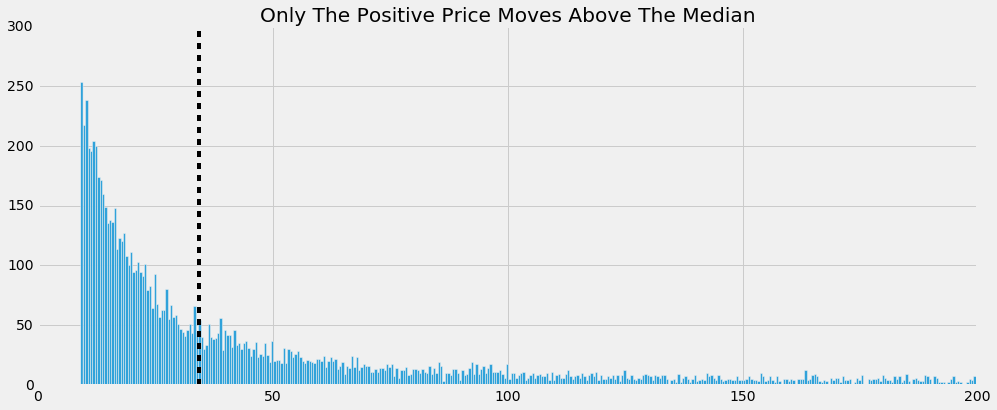

In [64]:
pos_y_am = np.array(pos_y[pos_y > np.median(pos_y)])
plt.axvline(x=np.median(pos_y_am),ymin=0,ymax=250,color='k',ls='dashed')
plt.title("Only The Positive Price Moves Above The Median")
# note that a max x value of 200 for bins is arbitrary - very long tail
hist = plt.hist(pos_y_am,bins=np.arange(np.min(pos_y_am),200,0.5))

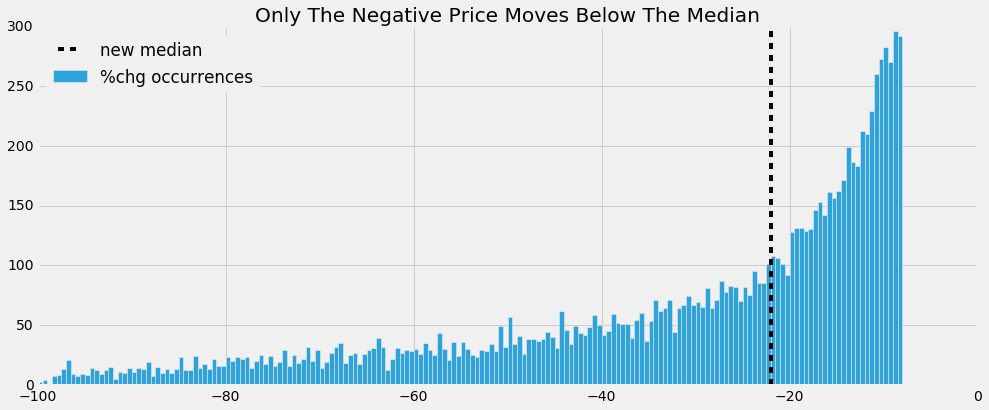

In [65]:
neg_y_am = np.array(neg_y[neg_y < np.median(neg_y)])
plt.axvline(x=np.median(neg_y_am),ymin=0,ymax=250,color='k',ls='dashed',label='new median')
plt.title("Only The Negative Price Moves Below The Median")
hist = plt.hist(neg_y_am,bins=np.arange(-100,np.max(neg_y_am),0.5),label='%chg occurrences')
plt.legend(loc='upper left')

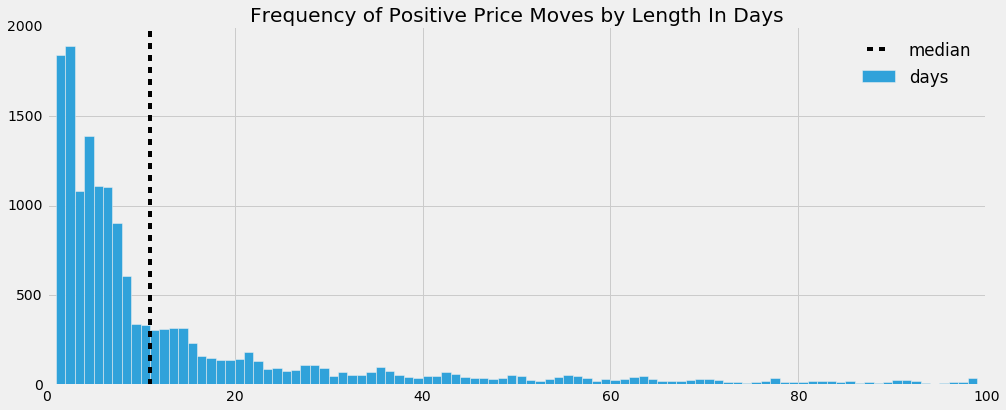

In [66]:
pos_y_days = np.array(posdf['length'].dt.days)
plt.axvline(x=np.median(pos_y_days),ymin=0,ymax=2000,color='k',ls='dashed',label='median')
plt.title("Frequency of Positive Price Moves by Length In Days")
hist = plt.hist(pos_y_days,bins=np.arange(0,100,1),label='days')
plt.legend(loc='upper right')

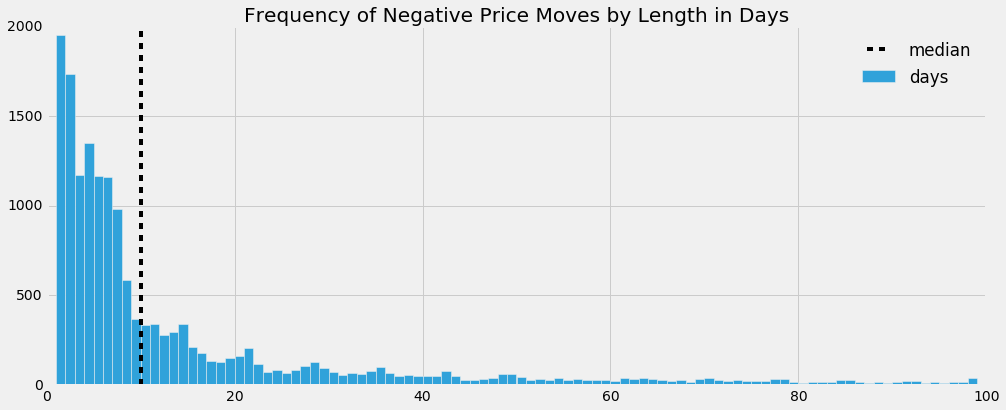

In [67]:
neg_y_days = np.array(negdf['length'].dt.days)
plt.axvline(x=np.median(neg_y_days),ymin=0,ymax=600,color='k',ls='dashed',label="median")
plt.title("Frequency of Negative Price Moves by Length in Days")
hist = plt.hist(neg_y_days,bins=np.arange(0,100,1),label='days')
plt.legend(loc='upper right')

In [68]:
pos_y[:5]

array([ 12.00294551,  80.17857143,  43.96624473,   9.95644057,  94.32098765])

In [69]:
pos_y_days[:5]

array([140, 411, 461, 301, 419])

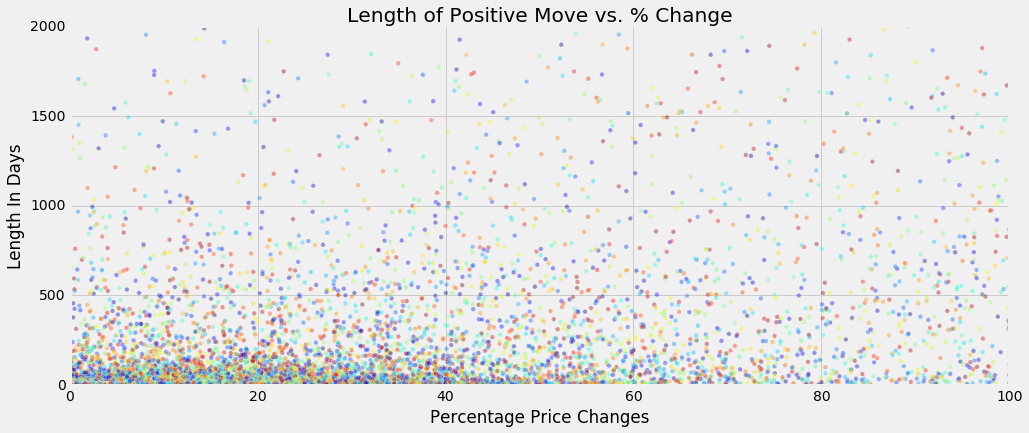

In [70]:
# these x and y limits can be expanded to see more points
plt.xlim((0,100))
plt.ylim((0,2000))
plt.title("Length of Positive Move vs. % Change")
plt.ylabel("Length In Days")
plt.xlabel("Percentage Price Changes")
# actually I want the colors to go on a scale
colors = np.random.rand(len(pos_y))
plt.scatter(pos_y,pos_y_days,c=colors,alpha=0.4)

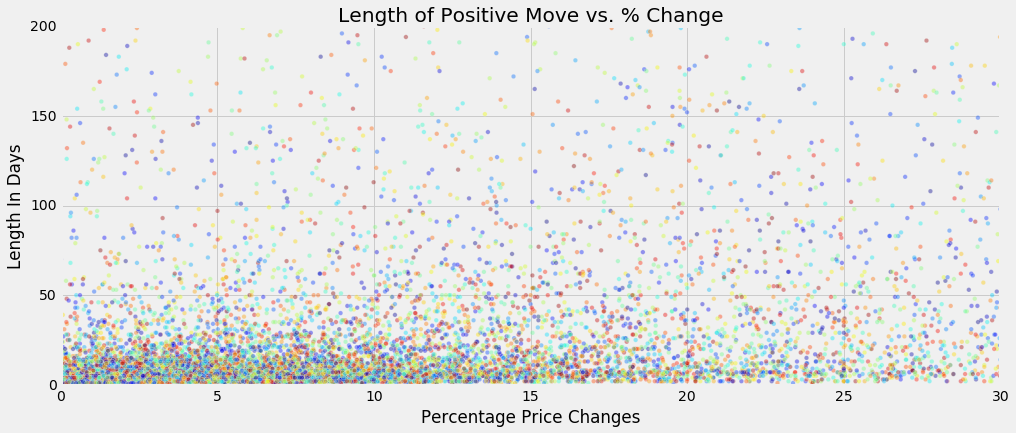

In [71]:
# these x and y limits can be expanded to see more points
# zooming in a bit
plt.xlim((0,30))
plt.ylim((0,200))
plt.title("Length of Positive Move vs. % Change")
plt.ylabel("Length In Days")
plt.xlabel("Percentage Price Changes")
# actually I want the colors to go on a scale
colors = np.random.rand(len(pos_y))
plt.scatter(pos_y,pos_y_days,c=colors,alpha=0.4)

In [72]:
# plot each "regime" just to look at them
#grouped2891 = fulldf2891.groupby(by="ticker")

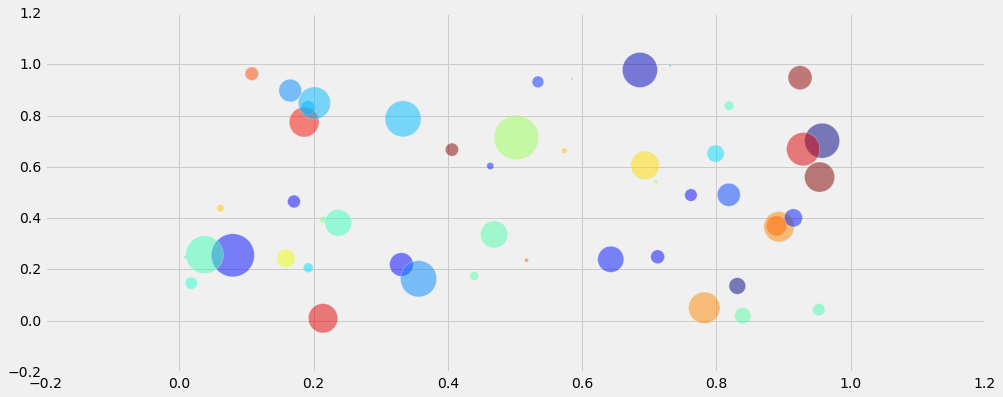

In [73]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (25 * np.random.rand(N))**2  # 0 to 25 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
A = tickergroups.get_group("A")
A1 = A.set_index(A.Date)

In [ ]:
# iterating over pandas rows
# for index, row in df.iterrows():
#     row['a'], index

# OR:

# for idx in df.index:
#     df.ix[idx]['a'], idx

In [ ]:
def get_pairs(grp):
    return pd.DataFrame({
        "end": grp["day"], "chg": grp['chg%'],
        "start": grp["day"].shift(1)
    }).iloc[1:]

In [ ]:
neg2891pairs = neg2891.groupby(["ticker"]).apply(lambda grp: get_pairs(grp)).reset_index()

In [ ]:
neg2891pairs.head()

In [ ]:
# start = test1.ix[0]["day_minus_1"].strftime("%Y-%m-%d")
# end = test1.ix[0]["day"].strftime("%Y-%m-%d")
# A1.ix[start: end].plot(y=["Adj. Close"])

In [ ]:
# add standard deviations and prices either side of bands
# for each regime
# HMMMM - may be better to start with rolling std at source
def get_pairs(grp):
    return pd.DataFrame({
        "end": grp["day"], "chg": grp['chg%'],
        "start": grp["day"].shift(1)
    }).iloc[1:]

def getstddevs(chg_df,maxiters=10):
    pairsdf = chg_df.groupby(["ticker"]).apply(lambda grp: get_pairs(grp)).reset_index()

    tick = pairsdf.ix[0]["ticker"]
    this_data= tickergroups.get_group(tick)
    this_data.set_index(this_data.Date,inplace=True) 
    
    counter = 0
    
    for idx in pairsdf.index:

        if pairsdf.ix[idx]["ticker"] == tick:
            start = pairsdf.ix[idx]["start"].strftime("%Y-%m-%d")
            end = pairsdf.ix[idx]["end"].strftime("%Y-%m-%d")
            std = this_data[start: end].std()
            pairsdf["std"] = std
        
        elif pairsdf.ix[idx]["ticker"] != tick:
            tick = pairsdf.ix[idx]["ticker"]
            this_data = tickergroups.get_group(tick)
            this_data.set_index(this_data.Date,inplace=True)
            
            start = pairsdf.ix[idx]["start"].strftime("%Y-%m-%d")
            end = pairsdf.ix[idx]["end"].strftime("%Y-%m-%d")
            std = this_data[start: end].std()
            pairsdf["std"] = std
    
        counter += 1
        if counter >= maxiters:
            return std, this_data[start:end]

In [ ]:
pairsstd, data = getstddevs(neg2891,maxiters=20)

In [ ]:
pairsstd

In [ ]:
data.head(2)

In [ ]:
def get_pairs(grp):
    return pd.DataFrame({
        "end": grp["day"], "chg": grp['chg%'],
        "start": grp["day"].shift(1)
    }).iloc[1:]

def plotregimes(chg_df,maxplots=10):
    pairsdf = chg_df.groupby(["ticker"]).apply(lambda grp: get_pairs(grp)).reset_index()

    tick = pairsdf.ix[0]["ticker"]
    this_data= tickergroups.get_group(tick)
    this_data.set_index(this_data.Date,inplace=True)
    
    counter = 0
    
    for idx in pairsdf.index:

        if pairsdf.ix[idx]["ticker"] == tick:
            start = pairsdf.ix[idx]["start"].strftime("%Y-%m-%d")
            end = pairsdf.ix[idx]["end"].strftime("%Y-%m-%d")
            this_data[start: end].plot(y=["Adj. Close"])
        
        elif pairsdf.ix[idx]["ticker"] != tick:
            tick = pairsdf.ix[idx]["ticker"]
            this_data = tickergroups.get_group(tick)
            this_data.set_index(this_data.Date,inplace=True)
            
            start = pairsdf.ix[idx]["start"].strftime("%Y-%m-%d")
            end = pairsdf.ix[idx]["end"].strftime("%Y-%m-%d")
            this_data[start: end].plot(y=["Adj. Close"])
    
        counter += 1
        if counter >= maxplots:
            break
    
#     tick = chg_df.ix[0]["ticker"]
#     this_data = tickergroups.get_group(tick)
#     plotcounter = 0
#     backupcounter = 0
#     for idx in chg_df.index:
#         #tick = chg_df.ix[0]["ticker"]
#         if idx > 0:
#             if chg_df.ix[idx]["ticker"] != tick:
#                 tick = chg_df.ix[idx]["ticker"]
#                 this_data = tickergroups.get_group(tick)
#                 this_data.set_index(this_data.Date,inplace=True)
#                 continue
#             elif chg_df.ix[idx]["ticker"] == tick:
#                 start = chg_df.ix[idx-1]["day"].strftime("%Y-%m-%d")
#                 end = chg_df.ix[idx]["day"].strftime("%Y-%m-%d")
#                 #print(type(start),type(end))
#                 #print(start, end)
#                 if len(this_data.ix[start:end]) > 0:
#                     print("Plotted: ",tick,start,end)
#                     print(type(start),type(end))
#                     this_data.ix[start:end].plot(y=["Adj. Close"])
#                     plotcounter +=1
#                     if plotcounter >= maxplots:
#                         break
#                 else:
#                     print("NOT plotted: ",tick,start,end)
#         backupcounter += 1
#         if backupcounter > 30:
#             break

In [ ]:
A = tickergroups.get_group("A")
A1 = A.set_index(A.Date)

In [ ]:
A1.ix['2000-10-04': '2000-12-04'].plot(y=["Adj. Close"])

In [ ]:
def get_pairs(grp):
    return pd.DataFrame({
        "day": grp["day"], 
        "day_minus_1": grp["day"].shift(1)
    }).iloc[1:]
test1 = neg2891.head(6).groupby(["ticker"]).apply(lambda grp: get_pairs(grp)).reset_index()


In [ ]:
test1

In [ ]:
start = test1.ix[0]["day_minus_1"].strftime("%Y-%m-%d")
end = test1.ix[0]["day"].strftime("%Y-%m-%d")
A1.ix[start: end].plot(y=["Adj. Close"])

In [ ]:
neg2891.head(5)["day"][0].strftime("%Y-%m-%d")

In [ ]:
#A1.ix['2012-08-29':'2015-09-15'].plot(y=["Adj. Close"])
A1.ix['2000-12-04':'2001-08-27'].plot(y=["Adj. Close"])

In [ ]:
neg2891.columns

In [ ]:
#plotregimes(neg2891)

In [ ]:
neg2891.head(3)

In [ ]:
type(neg2891.ix[1]["day"])

In [ ]:
#IBM.ix['2007-01-01':'2010-01-01'].plot(y=["Adj. Close","Spline"])
A1.ix['2003-01-29':'2004-03-15'].plot(y=["Adj. Close"])

In [ ]:
fulldf2891.describe()

In [ ]:
#checking the autocorrelation
from scipy import signal
#plt.plot(signal.correlate(testFX,testFX))
#plt.plot(np.correlate(testFX,testFX[30:]))
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result
plt.plot(estimated_autocorrelation(testFX))

In [ ]:
# fitting piecewise cubic polynomials to the data
# squeeze gets rid of redundant dimensions
# can try to compress the data by filtering it first
#func = interp1d(np.squeeze(Xi),np.squeeze(y),kind='cubic')
# s is the chisquare of the spline against the data
# take rolling std deviation, square, and add = s
# s = x% * meanpx * numdatapoints
func = UnivariateSpline(np.squeeze(Xi),np.squeeze(y),s=75000)
fder = func.derivative()

In [ ]:
# to get the "periodicity" of the spline, use the autocorrelation function

In [ ]:
for item, frame in IBM_AC_series.iteritems():
    if frame > 4.85 and frame < 4.86:
        print(item,frame)

In [ ]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
#df = pd.DataFrame({"IBM AC":IBM.ix[datearray]['Adj. Close']},index=datearray)

In [ ]:
import time
#str(X[0])
x0 = IBM_AC.index.astype(str)[:10].astype(datetime)
x1 = IBM_AC.index.astype(str)[:10]

#### Create a slope-change backtest function
#### Create a "update all with slope status" function
#### Create an "aggregate slope status of many stocks" function to superimpose on index
remember to load some indices from some other quandl or other data source

In [ ]:
#IBM.iloc[-1000:].plot(y=["Adj. Close","Spline"])
IBM.ix['2007-01-01':'2010-01-01'].plot(y=["Adj. Close","Spline"])

In [ ]:
lr = LinearRegression()
lr1h = LinearRegression()
lr2h = LinearRegression()
lr.fit(Xi,y)

In [ ]:
Xi_1h = Xi[:int((len(y)/2))]
y_1h = y[:int((len(y)/2))]
Xi_2h = Xi[int(len(y)/2):]
y_2h = y[int(len(y)/2):]

lr1h = lr1h.fit(Xi_1h,y_1h)
lr2h = lr2h.fit(Xi_2h,y_2h)

In [ ]:
# calculating a projection of an "initial" trendline
# lets first do a linear regression line on the third fourth of the data
y_Q3 = y_2h[:int(len(y_2h)/2)]
X_Q3 = Xi_2h[:int(len(y_2h)/2)]
lrQ3 = LinearRegression()

In [ ]:
print(len(y_Q3),len(X_Q3))

In [ ]:
y_Q3

In [ ]:
lrQ3 = lrQ3.fit(X_Q3,y_Q3)
pred_y_Q3 = lrQ3.predict(X_Q3)
pred_y_Q3_a1 = pred_y_Q3 + y_Q3.std()
pred_y_Q3_b1 = pred_y_Q3 - y_Q3.std()

In [ ]:
pred_y_Q3[2] - pred_y_Q3[1]

In [ ]:
def extend_line(slope,npline,n):
    point = npline[-1]
    for i in range(n):
        point = point+slope
        npline = np.append(npline,point)
    return npline

In [ ]:
# now how to extend?
pred_yQ3_extend = extend_line(0.02412376,pred_y_Q3,len(Xi_2h)-len(pred_y_Q3))
pred_y_Q3_ex_a1 = pred_yQ3_extend + y_Q3.std()
pred_y_Q3_ex_b1 = pred_yQ3_extend - y_Q3.std()

In [ ]:
# I guess you can't just average 1h and 2h?
print(y.std(),y_1h.std(),y_2h.std(),y_Q3.std())

In [ ]:
pred_y = lr.predict(Xi)
pred_y_1h = lr1h.predict(Xi_1h)
pred_y_2h = lr2h.predict(Xi_2h)
pred_y1h_a1 = pred_y_1h + y_1h.std()
pred_y1h_b1 = pred_y_1h - y_1h.std()
pred_y2h_a1 = pred_y_2h + y_2h.std()
pred_y2h_b1 = pred_y_2h - y_2h.std()

In [ ]:
print(len(pred_y),len(pred_y_1h),len(pred_y_2h),len(pred_y_Q3))

In [ ]:
print(len(Xi_2h),len(pred_yQ3_extend))

In [ ]:
plt.figure()
# plt.plot(pred_y)
#plt.plot(Xi,y)

# plt.plot(Xi_1h,pred_y_1h)
# plt.plot(Xi_1h,pred_y1h_a1)
# plt.plot(Xi_1h,pred_y1h_b1)

# plt.plot(Xi_2h,pred_y_2h)
# plt.plot(Xi_2h,pred_y2h_a1)
# plt.plot(Xi_2h,pred_y2h_b1)

# plt.plot(X_Q3,pred_y_Q3)
# plt.plot(X_Q3,pred_y_Q3_a1)
# plt.plot(X_Q3,pred_y_Q3_b1)

# plt.plot(Xi_2h,pred_yQ3_extend)
# plt.plot(Xi_2h,pred_y_Q3_ex_a1)
# plt.plot(Xi_2h,pred_y_Q3_ex_b1)
plt.plot(Xi,func(Xi),lw=2)

plt.show()

In [ ]:
plt.plot(Xi[:len(Xi)/2],y[:len(Xi)/2])

In [ ]:
len(y)

In [ ]:
from scipy.interpolate import interp1d, UnivariateSpline
# fitting piecewise cubic polynomials to the data
# squeeze gets rid of redundant dimensions
# can try to compress the data by filtering it first
# they have 
#func = interp1d(np.squeeze(Xi),np.squeeze(y),kind='cubic')
func = UnivariateSpline(np.squeeze(Xi),np.squeeze(y),s=75000)
fder = func.derivative()

In [ ]:
len(fder(Xi)[fder(Xi)==0])

In [ ]:
fder(Xi).mean()

In [ ]:
plt.plot(Xi,fder(Xi))

In [ ]:
plt.plot(Xi,100*(y-func(Xi))/y)

In [ ]:
# calculate the percentage of price action that is contained within the 1std bands
y_1h = y[:len(y)/2]
count = 0
for idx, val in enumerate(y_1h):
    if val > pred_y1h_a1[idx] or val < pred_y1h_b1[idx]:
        count +=1
print((count/len(y_1h))*100)
# 7% seems plausible - why do I get a DeprecationWarning tho?

In [ ]:
# calculate the percentage of price action that is contained within the 1std bands
y_2h = y[len(y)/2:]
count = 0
for idx, val in enumerate(y_2h):
    if val > pred_y2h_a1[idx] or val < pred_y2h_b1[idx]:
        count +=1
print((count/len(y_2h))*100)

## ITERATE EVERYTHING

In [ ]:
numtickers = 350
wikicodes = pd.read_csv("WIKI-datasets-codes.csv",names=["Ticker","Name"],nrows=numtickers)
wikicodes.sort_values(by="Ticker",inplace='True')
wikicodes.reset_index(inplace=True)
wikicodes.drop("index",axis=1,inplace=True)
tickers = wikicodes.drop(["Name"],axis=1,inplace=False)

In [ ]:
wikicodes.head(2)

In [ ]:
tickers.head(2)

In [ ]:
IBM_changes.head(3)

In [ ]:
IBM_truncated = IBM_changes.drop(["close","spline","deriv","deriv_sh1"],axis=1)

In [ ]:
IBM_truncated.head(2)

In [ ]:
qq = np.array([])

In [ ]:
def iterateallgetdict(tickers):
    results = {}
    for x in range(len(tickers)):
        this_ticker = tickers.iloc[x][0]
        this_data = quandl.get(this_ticker)
        this_change = createChangeDF(createXYFD(this_data))
        if len(this_change) != 0:
            this_change.dropna(how='any',inplace=True)
            results[this_ticker] = this_change.drop(["day","close","spline","deriv","deriv_sh1"],axis=1)
    return results

def iterateallgetdf(tickers):
    results = []
    counter = 0
    for x in range(len(tickers)):
        counter += 1
        this_ticker = tickers.iloc[x][0]
        quandl.ApiConfig.api_key = "dCV21k8yJjw68AFeiUqy"
        this_data = quandl.get(this_ticker)
        this_change = createChangeDF(createXYFD(this_data))
        if len(this_change) != 0:
            this_change.dropna(how='any',inplace=True)
            results.append(this_change.drop(["day","close","spline","deriv","deriv_sh1"],axis=1))
        print("Did number ",counter)
    return pd.concat(results)

def iterateallgetfulldf(tickers):
    results = []
    counter = 0
    for x in range(len(tickers)):
        counter += 1
        this_ticker = tickers.iloc[x][0]
        quandl.ApiConfig.api_key = "dCV21k8yJjw68AFeiUqy"
        this_data = quandl.get(this_ticker)
        this_change = createChangeDF(createXYFD(this_data))
        if len(this_change) != 0:
            this_change.dropna(how='any',inplace=True)
            results.append(this_change)
        print("Did number ",counter)
    return pd.concat(results)

In [ ]:
# takes a while - maybe work on the main file first?
#testresult = iterateallgetdf(tickers)
#testresult = iterateallgetdict(tickers)
fullchanges350 = iterateallgetfulldf(tickers)

In [ ]:
negs = testresult[testresult.slope < 0]
poss = testresult[testresult.slope > 0]

In [ ]:
negs.describe()

In [ ]:
poss.describe()

In [ ]:
testresult.head()